# Regression Modeling in Practice

## Week 1

In [2]:
import pandas as pd
import numpy

file=pd.read_csv('Alcohol.csv', sep=r'\s*,\s*',header=0, encoding='ascii', engine='python')

In [3]:
#S2AQ21A HOW OFTEN DRANK ANY ALCOHOL DURING PERIOD OF HEAVIEST DRINKING
#S1Q6A HIGHEST GRADE OR YEAR OF SCHOOL COMPLETED

#Select columns

df=file[['S2AQ21A','S1Q6A']]

In [4]:
#rename columns
df=df.rename(columns={'S2AQ21A':'alcoholic_score','S1Q6A':'school_level'})

In [5]:
#eliminate Nan Values and type modifications
import numpy as np
df.alcoholic_score= df.alcoholic_score.replace(r'^\s*$', np.nan, regex=True)
df.school_level= df.school_level.replace(r'^\s*$', np.nan, regex=True)
df = df[df['alcoholic_score'].notna()]
df = df[df['school_level'].notna()]
df['alcoholic_score']=df['alcoholic_score'].astype(int)

In [6]:
alcolist=df[df['alcoholic_score']<4].count()
print('total number of alcolist')
print(alcolist[0])


total number of alcolist
10302


In [7]:
#percentage of alcolist with lower school instruction
a=df[(df['alcoholic_score']<4)&(df['school_level']<8)].count()
#percentage of alcolist with medium school instruction
b=df[(df['alcoholic_score']<4)&(df['school_level']>7)&(df['school_level']<12)].count()
#percentage of alcolist with upper school instruction
c=df[(df['alcoholic_score']<4)&(df['school_level']>11)].count()

print('percentage of each group')
print((a[0],b[0],c[0])/alcolist[0])

percentage of each group
[0.13754611 0.58930305 0.27315084]


## Week 2

In [87]:
#import libraries
import statsmodels.api 
import statsmodels.formula.api as smf
import seaborn
import matplotlib.pyplot as plt


In [88]:
# S3AQ3C1 USUAL QUANTITY WHEN SMOKED CIGARETTES
#S2AQ8B NUMBER OF DRINKS OF ANY ALCOHOL USUALLY CONSUMED ON DAYS WHEN DRANK ALCOHOL IN LAST 12 MONTHS
df=file[['S3AQ3C1','S2AQ8B']]
#rename columns
df=df.rename(columns={'S3AQ3C1':'cigarettes','S2AQ8B':'drinks'})
df.head(4)

,cigarettes,drinks
0,NaN,NaN
1,NaN,1.0
2,NaN,NaN
3,NaN,NaN


In [45]:
#eliminate Nan Values and type modifications

df.cigarettes= df.cigarettes.replace(r'^\s*$', np.nan, regex=True)
df.drinks= df.drinks.replace(r'^\s*$', np.nan, regex=True)
df = df[df['cigarettes'].notna()]
df = df[df['drinks'].notna()]
df['cigarettes']=df['cigarettes'].astype(int)
df['drinks']=df['drinks'].astype(int)
#eliminate unknown rows
df.drop(df.index[(df["cigarettes"] == 99)|(df["drinks"] == 99)],axis=0,inplace=True)


In [123]:
#subtract the mean from the explanatory variable
mean=df['cigarettes'].mean()
df['cigarettes']=df['cigarettes']-mean


AxesSubplot(0.125,0.125;0.775x0.755)


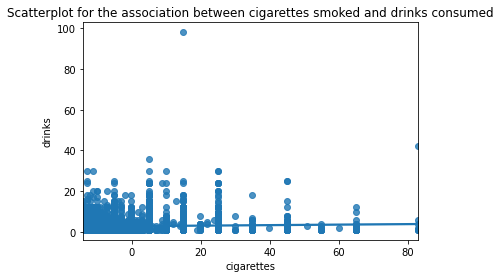

In [52]:
#Basic linear regression
scat=seaborn.regplot(x="cigarettes",y="drinks",data=df,scatter=True)
plt.title('Scatterplot for the association between cigarettes smoked and drinks consumed')
print(scat)

In [54]:
#outlier
c=df[df['drinks']>90]
c

,cigarettes,drinks
11822,14.963965,98


In [55]:
print('OLS regression model for the association between smoking and drinking')
reg=smf.ols('drinks~cigarettes',data=df).fit()
print(reg.summary())
print()
print()
print('the mean is:',df['cigarettes'].mean() ,'almost 0')

OLS regression model for the association between smoking and drinking
                            OLS Regression Results                            
Dep. Variable:                 drinks   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     36.86
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           1.30e-09
Time:                        11:39:19   Log-Likelihood:                -30831.
No. Observations:               12682   AIC:                         6.167e+04
Df Residuals:                   12680   BIC:                         6.168e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [56]:
print('The results of the linear regression model indicated that number of drinks (Beta=0.0124, p=.0001) was significantly and  low positively associated with number of cigarettes smoked')

The results of the linear regression model indicated that number of drinks (Beta=0.0124, p=.0001) was significantly and  low positively associated with number of cigarettes smoked


## Week 3

In [244]:
#import libraries
import statsmodels.api 
import statsmodels.formula.api as smf
import seaborn
import matplotlib.pyplot as plt


In [245]:
#S3BQ1A10A EVER USED OTHER DRUGS
#S4AQ1 EVER HAD 2-WEEK PERIOD WHEN FELT SAD, BLUE, DEPRESSED, OR DOWN MOST OF TIME
# S3AQ3C1 USUAL QUANTITY WHEN SMOKED CIGARETTES
#TABLIFEDX NICOTINE DEPENDENCE - LIFETIME
#S2BQ2E NUMBER OF EPISODES OF ALCOHOL DEPENDENCE
df=file[['S3AQ3C1','TABLIFEDX','S3BQ1A10A','S4AQ1','S2BQ2E']]
#rename columns
df=df.rename(columns={'S2BQ2E':'alc_dip','S3AQ3C1':'cigarettes','TABLIFEDX':'nicotine_dipendence','S3BQ1A10A':'drugs','S4AQ1':'depression'})
df.head(10)

,cigarettes,nicotine_dipendence,drugs,depression,alc_dip
0,NaN,0,2,2,NaN
1,NaN,0,2,2,NaN
2,NaN,0,2,2,NaN
3,NaN,0,2,2,NaN
4,NaN,0,2,2,NaN
5,NaN,0,2,2,1.0
6,NaN,0,2,1,NaN
7,NaN,0,2,2,NaN
8,NaN,0,2,1,NaN
9,NaN,0,2,2,1.0


In [263]:
#eliminate Nan Values and type modifications

df.cigarettes= df.cigarettes.replace(r'^\s*$', np.nan, regex=True)
df.nicotine_dipendence= df.nicotine_dipendence.replace(r'^\s*$', np.nan, regex=True)
df.drugs= df.drugs.replace(r'^\s*$', np.nan, regex=True)
df.depression= df.depression.replace(r'^\s*$', np.nan, regex=True)
df.alc_dip= df.alc_dip.replace(r'^\s*$', np.nan, regex=True)

df = df[df['cigarettes'].notna()]
df = df[df['nicotine_dipendence'].notna()]
df = df[df['drugs'].notna()]
df = df[df['depression'].notna()]
df = df[df['alc_dip'].notna()]

df['cigarettes']=df['cigarettes'].astype(int)
df['nicotine_dipendence']=df['nicotine_dipendence'].astype(int)
df['drugs']=df['drugs'].astype(int)
df['depression']=df['depression'].astype(int)
df['alc_dip']=df['alc_dip'].astype(int)


#eliminate unknown rows
df.drop(df.index[(df["cigarettes"] == 99)|(df["alc_dip"] == 99)|(df["drugs"] == 9)|(df["depression"] == 9)],axis=0,inplace=True)


In [264]:
#replace 2 with 0
df["drugs"].replace({2: 0}, inplace=True)
df["depression"].replace({2: 0}, inplace=True)


In [265]:
#subtract the mean from the explanatory variable
mean=df['alc_dip'].mean()
df['alc_dip']=df['alc_dip']-mean



In [266]:
df['alc_dip']=df['alc_dip'].head(500)
df['cigarettes']=df['cigarettes'].head(500)
df['nicotine_dipendence']=df['nicotine_dipendence'].head(500)
df['drugs']=df['drugs'].head(500)
df['depression']=df['depression'].head(500)

In [267]:
#regression
reg=smf.ols('cigarettes~drugs+depression+alc_dip+nicotine_dipendence',data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             cigarettes   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     7.319
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           8.26e-05
Time:                        11:37:07   Log-Likelihood:                -1935.8
No. Observations:                 500   AIC:                             3880.
Df Residuals:                     496   BIC:                             3896.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.8613    

In [268]:
print( 'the model has coef=(1.82,2.48,4,29,2.08) and p-value(0,0.452,0,0) that suggests that there is not a strong evidence for drug and it could be a confounding variable. There is a strong collinearity which make me think about the capacity of the model so I continue with some other graphics')

the model has coef=(1.82,2.48,4,29,2.08) and p-value(0,0.452,0,0) that suggests that there is not a strong evidence for drug and it could be a confounding variable. There is a strong collinearity which make me think about the capacity of the model so I continue with some other graphics


 residuals do not follow normal distribution


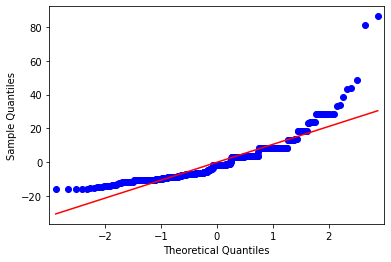

In [269]:
## qqplot
fig=statsmodels.graphics.gofplots.qqplot(reg.resid,line='r')
print(' residuals do not follow normal distribution')

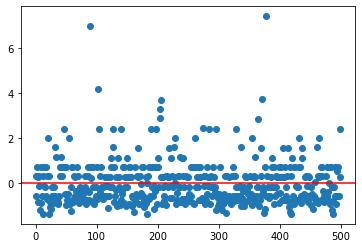

In [270]:
#plot of residuals
stdres=pd.DataFrame(reg.resid_pearson)
fig2=plt.plot(stdres,'o',ls='None')
l=plt.axhline(y=0,color='r')

In [271]:
#other regression diagnostic plot
#figure=plt.figure(figsize(12,8))
#fig=statsmodels.graphics.regressionplots.plot_regress_exog(reg,'alc_dip')

In [272]:
print('the model has diffulties to intepret the response variable for the absence of normal distribution in errors.A deeper analysis is required to investigate the nature of the problem:one could be that the variable alc_dip assumes valuens between 1-98 but just values between 1 and 2 are realistic')

the model has diffulties to intepret the response variable for the absence of normal distribution in errors.A deeper analysis is required to investigate the nature of the problem:one could be that the variable alc_dip assumes valuens between 1-98 but just values between 1 and 2 are realistic


## Week 4

In [303]:
#negotine dependence with number of cigarettes
#import libraries
import statsmodels.api 
import statsmodels.formula.api as smf
import seaborn
import matplotlib.pyplot as plt

In [312]:
#S4AQ1 EVER HAD 2-WEEK PERIOD WHEN FELT SAD, BLUE, DEPRESSED, OR DOWN MOST OF TIME
# S3AQ3C1 USUAL QUANTITY WHEN SMOKED CIGARETTES
#TABLIFEDX NICOTINE DEPENDENCE - LIFETIME

df=file[['S3AQ3C1','TABLIFEDX','S3BQ1A10A','S4AQ1','S2BQ2E']]
#rename columns
df=df.rename(columns={'S3AQ3C1':'cigarettes','TABLIFEDX':'nicotine_dipendence','S4AQ1':'depression'})


In [305]:
#eliminate Nan Values and type modifications

df.cigarettes= df.cigarettes.replace(r'^\s*$', np.nan, regex=True)
df.nicotine_dipendence= df.nicotine_dipendence.replace(r'^\s*$', np.nan, regex=True)
df.depression= df.depression.replace(r'^\s*$', np.nan, regex=True)


df = df[df['cigarettes'].notna()]
df = df[df['nicotine_dipendence'].notna()]
df = df[df['depression'].notna()]

df['cigarettes']=df['cigarettes'].astype(int)
df['nicotine_dipendence']=df['nicotine_dipendence'].astype(int)
df['depression']=df['depression'].astype(int)

#eliminate unknown rows
df.drop(df.index[(df["cigarettes"] == 99)|(df["depression"] == 9)],axis=0,inplace=True)


In [306]:
#replace 2 with 0

df["depression"].replace({2: 0}, inplace=True)


In [307]:
#logistic regression
lreg=smf.logit(formula='nicotine_dipendence~depression+cigarettes',data=df).fit()
print(lreg.summary())

Optimization terminated successfully.
         Current function value: 0.631726
         Iterations 5
                            Logit Regression Results                           
Dep. Variable:     nicotine_dipendence   No. Observations:                17558
Model:                           Logit   Df Residuals:                    17555
Method:                            MLE   Df Model:                            2
Date:                 Wed, 17 Feb 2021   Pseudo R-squ.:                 0.04724
Time:                         11:57:24   Log-Likelihood:                -11092.
converged:                        True   LL-Null:                       -11642.
Covariance Type:             nonrobust   LLR p-value:                1.390e-239
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2353      0.030    -41.798      0.000      -1.293      -1.177
depression     0.8055

In [308]:
#odds ratio with 95% confidence intervals
params=lreg.params
conf=lreg.conf_int()
conf['OR']=params
conf = conf.rename(columns={0: 'Lower CI', 1: 'Upper'})
#conf.columns['1','2','OR']
print(numpy.exp(conf))

            Lower CI     Upper        OR
Intercept   0.274387  0.308089  0.290750
depression  2.097481  2.387582  2.237835
cigarettes  1.025393  1.030689  1.028038


In [309]:
#logistic regression
lreg=smf.logit(formula='nicotine_dipendence~cigarettes',data=df).fit()
print(lreg.summary())
print()
#odds ratio with 95% confidence intervals
params=lreg.params
conf=lreg.conf_int()
conf['OR']=params
conf = conf.rename(columns={0: 'Lower CI', 1: 'Upper'})
#conf.columns['1','2','OR']
print(numpy.exp(conf))


Optimization terminated successfully.
         Current function value: 0.648762
         Iterations 5
                            Logit Regression Results                           
Dep. Variable:     nicotine_dipendence   No. Observations:                17558
Model:                           Logit   Df Residuals:                    17556
Method:                            MLE   Df Model:                            1
Date:                 Wed, 17 Feb 2021   Pseudo R-squ.:                 0.02155
Time:                         11:57:25   Log-Likelihood:                -11391.
converged:                        True   LL-Null:                       -11642.
Covariance Type:             nonrobust   LLR p-value:                3.980e-111
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9470      0.026    -36.250      0.000      -0.998      -0.896
cigarettes     0.0282

In [310]:

#logistic regression
lreg=smf.logit(formula='nicotine_dipendence~depression',data=df).fit()
print(lreg.summary())
print()
#odds ratio with 95% confidence intervals
params=lreg.params
conf=lreg.conf_int()
conf['OR']=params
conf = conf.rename(columns={0: 'Lower CI', 1: 'Upper'})
#conf.columns['1','2','OR']
print(numpy.exp(conf))


Optimization terminated successfully.
         Current function value: 0.645016
         Iterations 5
                            Logit Regression Results                           
Dep. Variable:     nicotine_dipendence   No. Observations:                17558
Model:                           Logit   Df Residuals:                    17556
Method:                            MLE   Df Model:                            1
Date:                 Wed, 17 Feb 2021   Pseudo R-squ.:                 0.02720
Time:                         11:57:25   Log-Likelihood:                -11325.
converged:                        True   LL-Null:                       -11642.
Covariance Type:             nonrobust   LLR p-value:                9.541e-140
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7991      0.020    -39.531      0.000      -0.839      -0.759
depression     0.8171

In [ ]:
#Results
Depression and cigarettes are valid variables with a p_value smaller than 0.001 with an odds ratio of (2.6459,1.0376) and confidence intervals
([1.7978,3.8939],[1.0199,1.055]).
This supports the hyphothesis of association between depression,cigarettes smoked and nicotine dependence.
There is not evidence of confounding for the association between your primary explanatory and the response variable as the other logistic regressions
and odds ratio show